# Introduction

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by the [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors). Specifically, we'll be looking at `recent-grads.csv`.

Each row in the dataset represents a different college major and contains information on gender diversity, employment rates, median earnings, and more. **In this project, we will seek to answer various questions centered around college majors and their associated median earnings and maybe some other interesting questions as well.**

Let's start digging in! The column headers and their descriptions are below:

| Header                 | Description                                                                |
| ---------------------- |--------------------------------------------------------------------------- |
| `Rank`                 | Rank by median earnings                                                    |
| `Major_code`           | Major code, FO1DP in ACS PUMS                                              |
| `Major`                | Major description                                                          |
| `Major_category`       | Category of major from Carnevale et al.                                    |
| `Total`                | Total number of people with major                                          |
| `Sample_size`          | Sample size (unweighted) of full-time, year-round ONLY (used for earnings) |
| `Men`                  | Number of male graduates                                                   |
| `Women`                | Numbe of female graduates                                                  |
| `ShareWomen`           | Women as proportion of total                                               |
| `Employed`             | Number employed                                                            |
| `Full_time`            | Number employed 35 hours or more                                           |
| `Part_time`            | Number employed less than 35 hours                                         |
| `Full_time_year_round` | Number employed at least 50 weeks and at least 35 hours                    |
| `Unemployed`           | Number unemployed                                                          |
| `Unemployment_rate`    | `Unemployed` / (`Unemployed` + `Employed`)                                 |
| `Median`               | Median earnings of full-time, year-round workers                           |
| `P25th`                | 25th percentile of earnings                                                |
| `P75th`                | 75th percentile of earnings                                                |
| `College_jobs`         | Number with job requiring a college degree                                 |
| `Non_college_jobs`     | Number with job not requiring a college degree                             |
| `Low_wage_jobs`        | Number in low-wage service jobs                                            |

Let's go ahead and take a look at the first five rows.

In [1]:
import pandas as pd
pd.options.display.max_columns = 100

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


How many rows are we dealing with?

In [2]:
recent_grads.shape[0]

173

Do we have any null values?

In [3]:
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

`Total`, `Men`, `Women`, and `ShareWomen` each contain one null value. Let's take a closer look.

In [4]:
recent_grads[recent_grads.isnull().any(axis=1)]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,2558,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


All four null values are located within the row for `FOOD SCIENCE`. We'll simply drop this row since it is only 1 out of 173 and won't significantly affect our analysis.

In [5]:
recent_grads = recent_grads.dropna()

recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

With zero null values across the board, let's proceed with the analysis!

# Do students in more popular majors make more money?

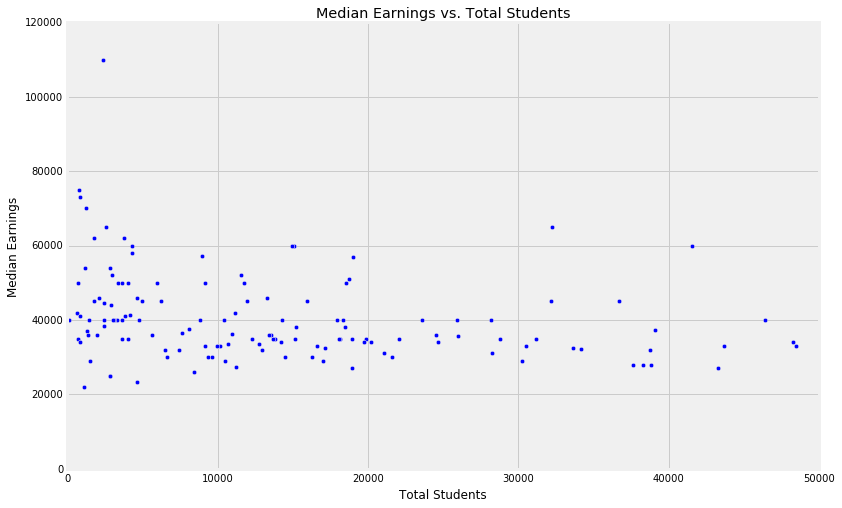

In [6]:
median_vs_total = recent_grads.plot(x="Total", y="Median", kind='scatter', figsize=(12,8),
                                    xlim=(0,50000), title="Median Earnings vs. Total Students")
median_vs_total.set_xlabel('Total Students')
median_vs_total.set_ylabel('Median Earnings')

There does not seem to be a strong relationship between the popularity of a major and how much money students of that major will make. All majors' median earnings fall within \$20,000 - \$80,000 with the exception of one outlier, `PETROLEUM ENGINEERING`. Furthermore, the vast majority of majors fall within \$20,000 - \$60,000. Let's see exactly how many.

In [7]:
len(recent_grads[recent_grads.Median.between(20000, 60000)]) / len(recent_grads)

0.9534883720930233

So we see that 95% of majors' median earnings are between \$20,000 and \$60,000. Finally, let's calculate the Pearson correlation coefficient `r` between the two variables.

In [8]:
recent_grads[['Total', 'Median']].corr()

,Total,Median
Total,1.000000,-0.106738
Median,-0.106738,1.000000


Just as we expected, `r ≈ -0.11` which is close to `r = 0`, indicating little to no linear correlation.

Despite this weak relationship, it is informative to note:

- Among very popular majors where `Total Students > 30,000`, only two majors have median earnings greater than or equal to \$60,000.

- Whereas, among moderately popular majors where `20,000 < Total Students < 30,000`, exactly zero majors have median earnings above \$60,000. In fact, three majors lie on the \$40,000 median earnings line with all others in that range below.

- And finally, among the least popular majors where `Total Students < 20,000`, 10 majors have median earnings greater than or equal to \$60,000.

The highest earning majors being among the least popular is in line with normal economic functions. It is demonstrative of specialization and supply and demand. A rough schematic of these relationships is as follows:

- `Specialization --> special --> less people --> less supply --> more demand --> higher value in job market which is compensated appropriately.`

So, if you're a student deciding on a major and looking to make a lot of money, you'll want a specialized job which, by their very nature, are less popular. However, given a random graduate and knowing only the popularity of his or her major, we cannot say all that much about his or her earnings.

# Do students that majored in subjects that were majority female make more money?

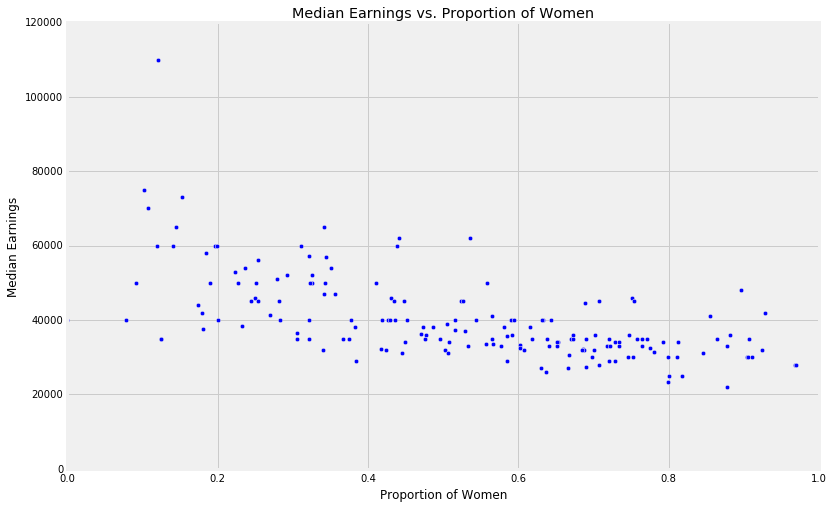

In [9]:
median_vs_share_women = recent_grads.plot(x="ShareWomen", y="Median", kind='scatter', figsize=(12,8),
                                          xlim=(0,1), title="Median Earnings vs. Proportion of Women")
median_vs_share_women.set_xlabel('Proportion of Women')
median_vs_share_women.set_ylabel('Median Earnings')

Here we do find a slight negative correlation between median earnings and the proportion of women. As the proportion of women starts to increase, median earnings begin to decrease. Again, let's calculate `r` and see just how strong of a relationship exists.

In [10]:
recent_grads[['ShareWomen', 'Median']].corr()

,ShareWomen,Median
ShareWomen,1.00000,-0.61869
Median,-0.61869,1.00000


As we suspected, `r ≈ -0.62`, which indicates a moderate negative linear correlation. It's not super strong, but it is there. This is in line with the modern conversation around the [gender pay gap](https://en.wikipedia.org/wiki/Gender_pay_gap). So, the answer is no -- students that majored in subjects that were majority female make **less** money when compared to majority male majors.

# Distribution of median earnings

Let's plot the distribution of median earnings with a histogram.

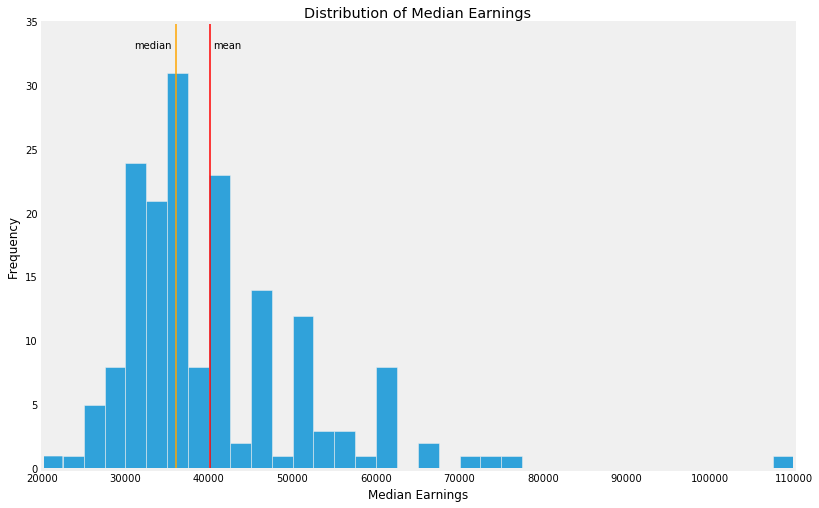

In [11]:
median_hist = recent_grads.Median.hist(range=(20000,110000), bins=36, figsize=(12,8))

median_hist.set_title('Distribution of Median Earnings')
median_hist.set_xlabel('Median Earnings')
median_hist.set_ylabel('Frequency')

median_hist.axvline(recent_grads.Median.mean(), linewidth=1.5, c='red', label='mean')
median_hist.text(40500, 33, 'mean')

median_hist.axvline(recent_grads.Median.median(), linewidth=1.5, c='orange', label='median')
median_hist.text(31000, 33, 'median')

median_hist.grid(False)

Here we see that most majors have median earnings between \$30,000 and \$42,500 with the peak between \$35,000 and \$37,500. The distribution is skewed right with a mean of about \$40,000 and a median of \$36,000.

Understanding the distribution across the board, let's examine more closely and see how various groups of related majors break down and compare both among themselves and to the whole. We will store the median of median earnings for each `Major_category` to help us compare distributions. As a measure of central tendency, the median is preferable to the mean when working with non-normal distributions.

# Distribution of median earnings by `Major_category`

In [12]:
major_cats = recent_grads.Major_category.unique()
print(major_cats)

['Engineering' 'Business' 'Physical Sciences' 'Law & Public Policy'
 'Computers & Mathematics' 'Industrial Arts & Consumer Services' 'Arts'
 'Health' 'Social Science' 'Biology & Life Science' 'Education'
 'Agriculture & Natural Resources' 'Humanities & Liberal Arts'
 'Psychology & Social Work' 'Communications & Journalism'
 'Interdisciplinary']


To make analysis a little easier, let's split `major_cats` into four groups. I will try to keep science, technology, engineering, and math (STEM) separate from business, humanities, arts and the like.

In [13]:
stem1 = ['Engineering', 'Computers & Mathematics', 'Physical Sciences', 'Biology & Life Science']

stem2 = ['Social Science', 'Industrial Arts & Consumer Services', 'Health', 'Psychology & Social Work']

business_etc = ['Business', 'Law & Public Policy', 'Communications & Journalism', 'Agriculture & Natural Resources']

arts_etc = ['Interdisciplinary', 'Education', 'Humanities & Liberal Arts', 'Arts']

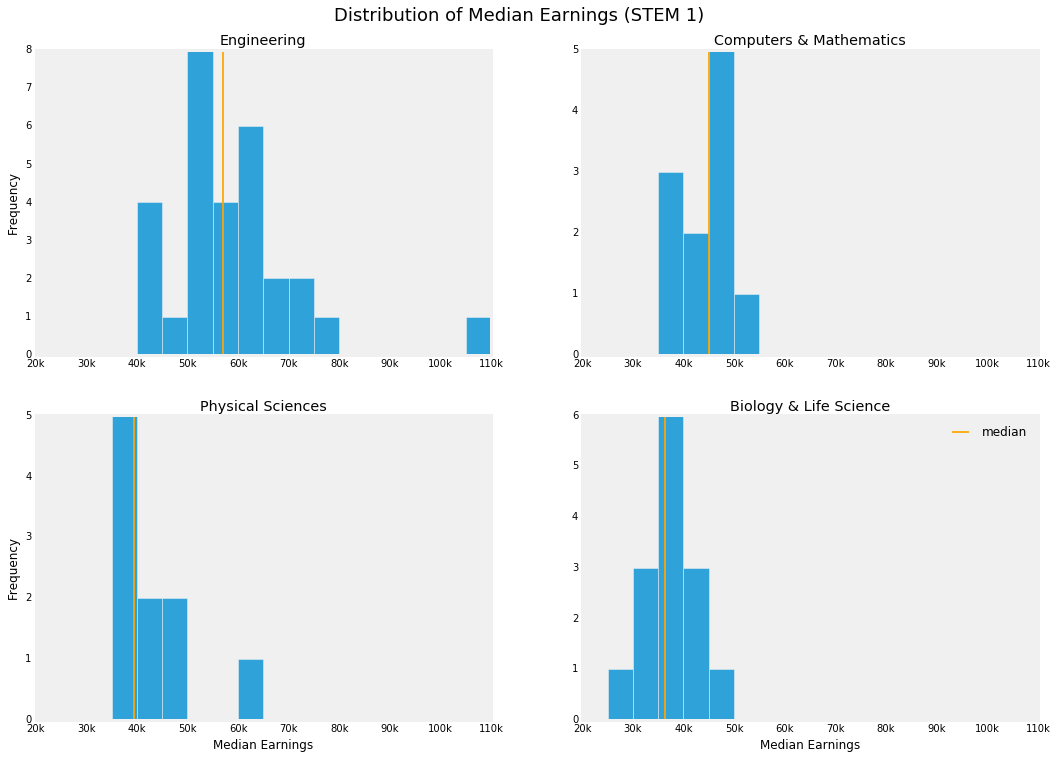

In [14]:
cat_mme = {} # major category to median of median earnings dictionary

fig = plt.figure(figsize=(16,12))
fig.suptitle('Distribution of Median Earnings (STEM 1)', fontsize=18, y=0.95)

for i, cat in enumerate(stem1): # limit 4 histograms per figure for readability
    df = recent_grads[recent_grads.Major_category == cat] # dataframe filtered to a single major category
    
    ax = fig.add_subplot(2,2,i+1)
    ax.hist(df.Median, range=(20000,110000), bins=18) # plot histogram
    
    mme = df.Median.median() # calculate and store median of median earnings
    cat_mme[cat] = mme
    
    # customize each histogram
    ax.set_title(cat)
    if i==2 or i==3:
        ax.set_xlabel('Median Earnings')
    if i==0 or i==2:
        ax.set_ylabel('Frequency')
    ax.set_xticklabels(['20k', '30k', '40k', '50k', '60k', '70k', '80k', '90k', '100k', '110k'])
    mme_line = ax.axvline(mme, linewidth = 1.75, c='orange', label='median')
    ax.grid(False)
    
ax.legend(handles=[mme_line])
plt.show()

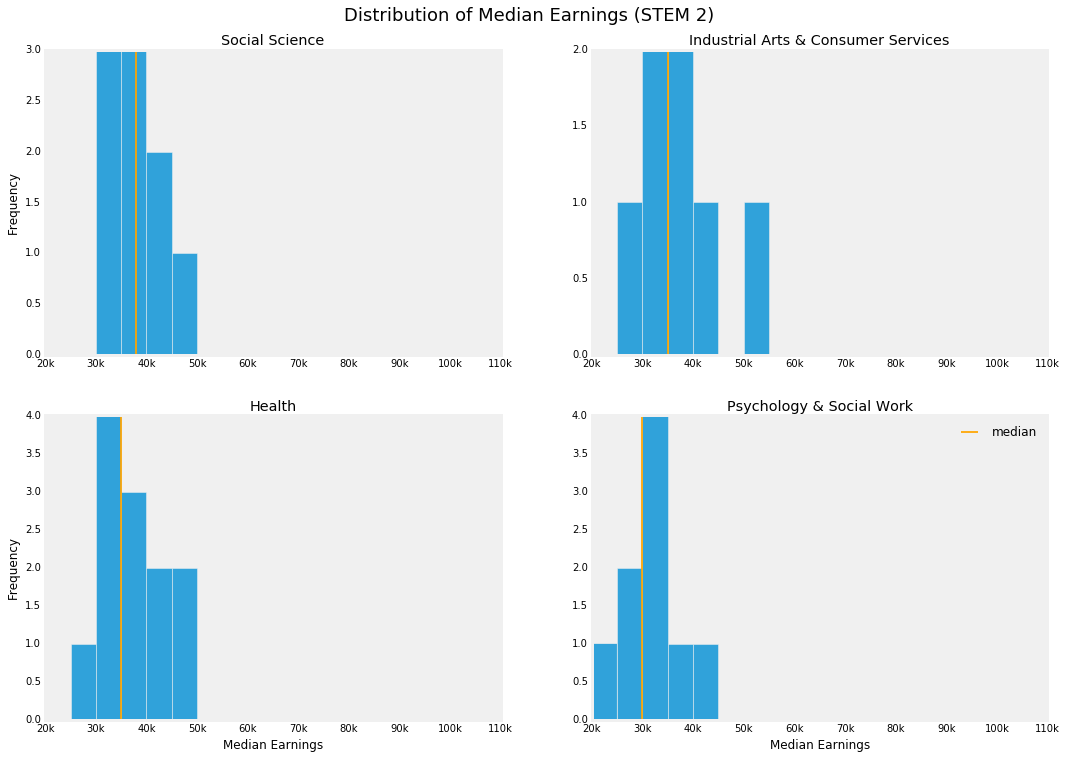

In [15]:
fig = plt.figure(figsize=(16,12))
fig.suptitle('Distribution of Median Earnings (STEM 2)', fontsize=18, y=0.95)

for i, cat in enumerate(stem2): # limit 4 histograms per figure for readability
    df = recent_grads[recent_grads.Major_category == cat] # dataframe filtered to a single major category
    
    ax = fig.add_subplot(2,2,i+1)
    ax.hist(df.Median, range=(20000,110000), bins=18) # plot histogram
    
    mme = df.Median.median() # calculate and store median of median earnings
    cat_mme[cat] = mme
    
    # customize each histogram
    ax.set_title(cat)
    if i==2 or i==3:
        ax.set_xlabel('Median Earnings')
    if i==0 or i==2:
        ax.set_ylabel('Frequency')
    ax.set_xticklabels(['20k', '30k', '40k', '50k', '60k', '70k', '80k', '90k', '100k', '110k'])
    mme_line = ax.axvline(mme, linewidth = 1.75, c='orange', label='median')
    ax.grid(False)
    
ax.legend(handles=[mme_line])
plt.show()

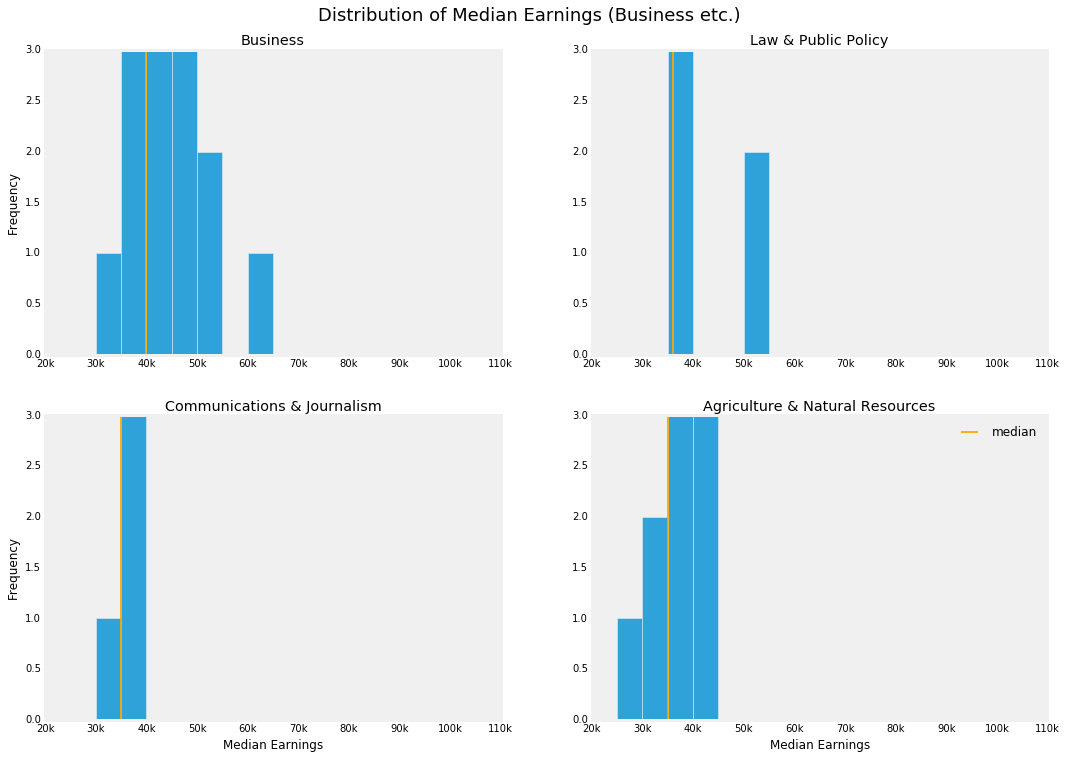

In [16]:
fig = plt.figure(figsize=(16,12))
fig.suptitle('Distribution of Median Earnings (Business etc.)', fontsize=18, y=0.95)

for i, cat in enumerate(business_etc): # limit 4 histograms per figure for readability
    df = recent_grads[recent_grads.Major_category == cat] # dataframe filtered to a single major category
    
    ax = fig.add_subplot(2,2,i+1)
    ax.hist(df.Median, range=(20000,110000), bins=18) # plot histogram
    
    mme = df.Median.median() # calculate and store median of median earnings
    cat_mme[cat] = mme
    
    # customize each histogram
    ax.set_title(cat)
    if i==2 or i==3:
        ax.set_xlabel('Median Earnings')
    if i==0 or i==2:
        ax.set_ylabel('Frequency')
    ax.set_xticklabels(['20k', '30k', '40k', '50k', '60k', '70k', '80k', '90k', '100k', '110k'])
    mme_line = ax.axvline(mme, linewidth = 1.75, c='orange', label='median')
    ax.grid(False)
    
ax.legend(handles=[mme_line])
plt.show()

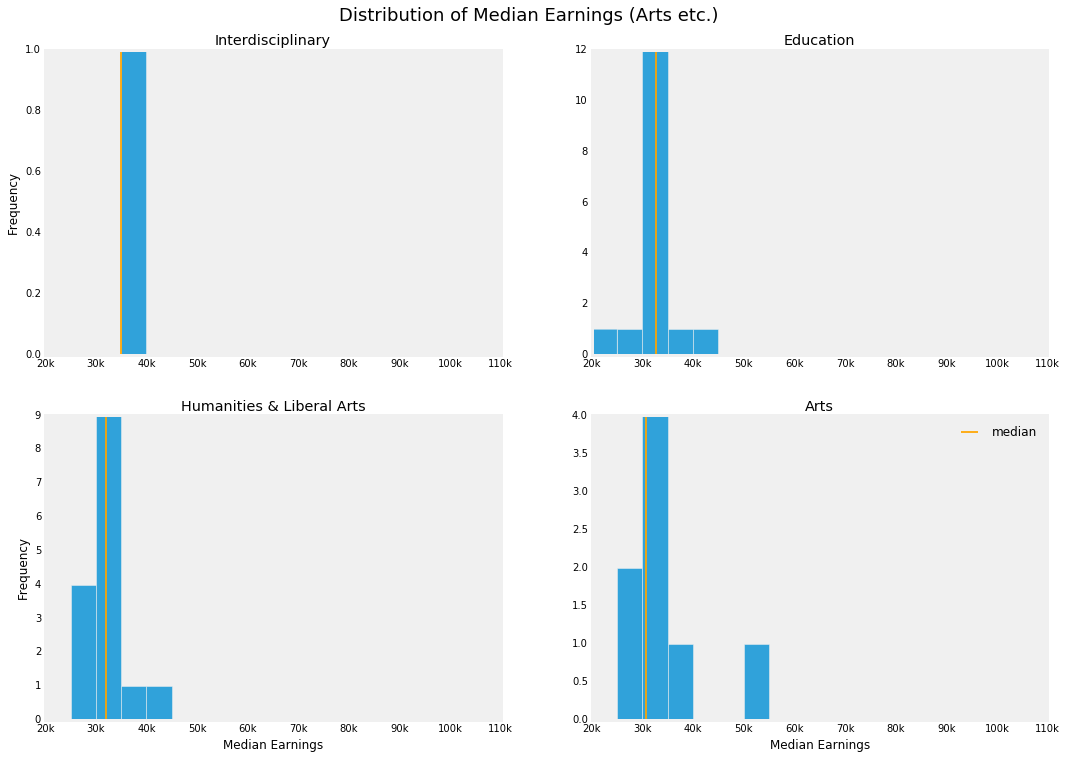

In [17]:
fig = plt.figure(figsize=(16,12))
fig.suptitle('Distribution of Median Earnings (Arts etc.)', fontsize=18, y=0.95)

for i, cat in enumerate(arts_etc): # limit 4 histograms per figure for readability
    df = recent_grads[recent_grads.Major_category == cat] # dataframe filtered to a single major category
    
    ax = fig.add_subplot(2,2,i+1)
    ax.hist(df.Median, range=(20000,110000), bins=18) # plot histogram
    
    mme = df.Median.median() # calculate and store median of median earnings
    cat_mme[cat] = mme
    
    # customize each histogram
    ax.set_title(cat)
    if i==2 or i==3:
        ax.set_xlabel('Median Earnings')
    if i==0 or i==2:
        ax.set_ylabel('Frequency')
    ax.set_xticklabels(['20k', '30k', '40k', '50k', '60k', '70k', '80k', '90k', '100k', '110k'])
    mme_line = ax.axvline(mme, linewidth = 1.75, c='orange', label='median')
    ax.grid(False)
    
ax.legend(handles=[mme_line])
plt.show()

Now, let's get a better understanding of how the medians of median earnings for all major categories compare to each other and to the dataset as a whole.

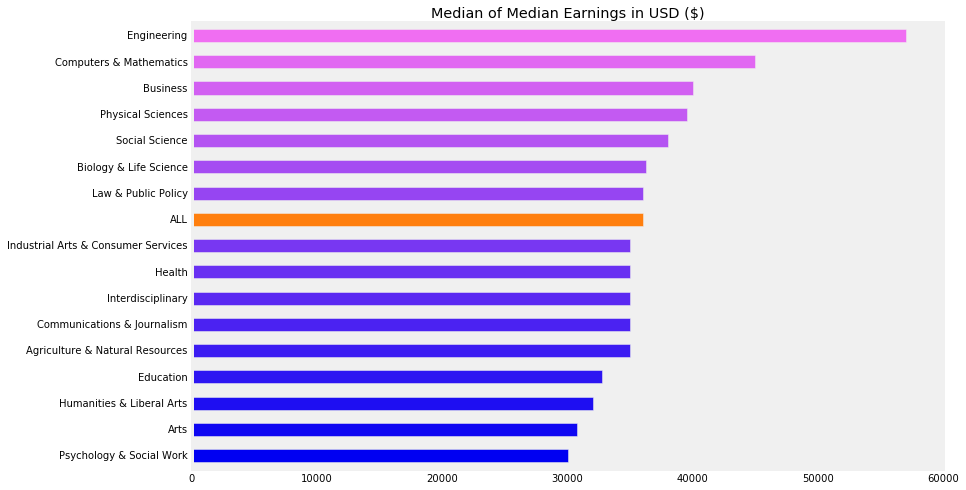

In [18]:
# add median of entire dataset's median earnings to `cat_mme` dictionary
cat_mme['ALL'] = recent_grads.Median.median()

median_of_median_earnings = pd.Series(cat_mme).sort_values()

# customize colors
colors = [(x/17, x/37, 0.95) for x in range(len(cat_mme))]
colors[9] = (1, 127/255, 14/255)

mme_barh = median_of_median_earnings.plot.barh(figsize=(12,8), color=colors)
mme_barh.set_title('Median of Median Earnings in USD ($)')
mme_barh.grid(False)

Here we can clearly see that STEM majors along with Business and Law & Public Policy are above average in median earnings. Engineering is decidedly the leader. Industrial Arts & Consumer Services, Health, Interdisciplinary, Communications & Journalism, and Agriculture & Natural Resources are all just slightly below average at \$35,000. As we move into Education, however, median earnings begin to decrease. I find this unfortunate since I believe areas like Education, the Arts, and Social Work are extremely important for the well-being of society and should be compensated competitively.

Next, we'll look at a couple more interesting columns: `Unemployment_rate` and `ShareWomen`.

# Unemployment rate

Let's plot the distribution of unemployment rate among all majors.

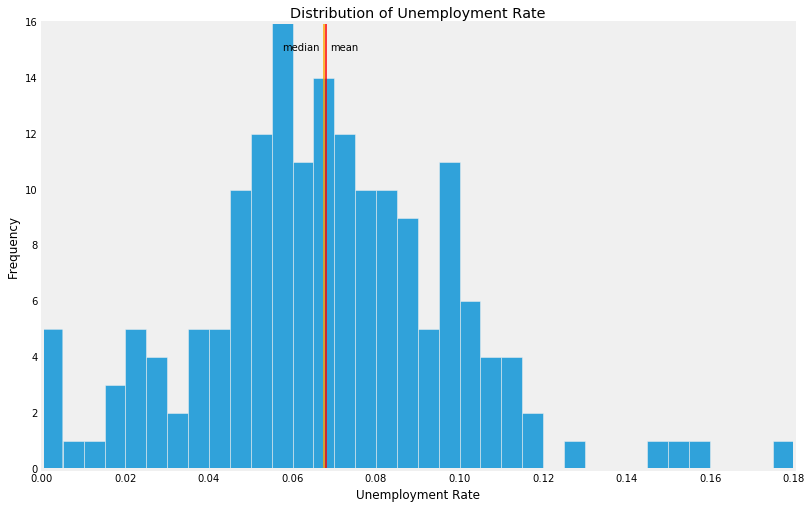

In [19]:
unemp_hist = recent_grads.Unemployment_rate.hist(range=(0.0,0.18), bins=36, figsize=(12,8))

unemp_hist.set_title('Distribution of Unemployment Rate')
unemp_hist.set_xlabel('Unemployment Rate')
unemp_hist.set_ylabel('Frequency')

unemp_hist.axvline(recent_grads.Unemployment_rate.mean(), linewidth=1.5, c='red', label='mean')
unemp_hist.text(0.069, 15, 'mean')

unemp_hist.axvline(recent_grads.Unemployment_rate.median(), linewidth=1.5, c='orange', label='median')
unemp_hist.text(0.0575, 15, 'median')

unemp_hist.grid(False)

## Which majors have the highest unemployment rate?

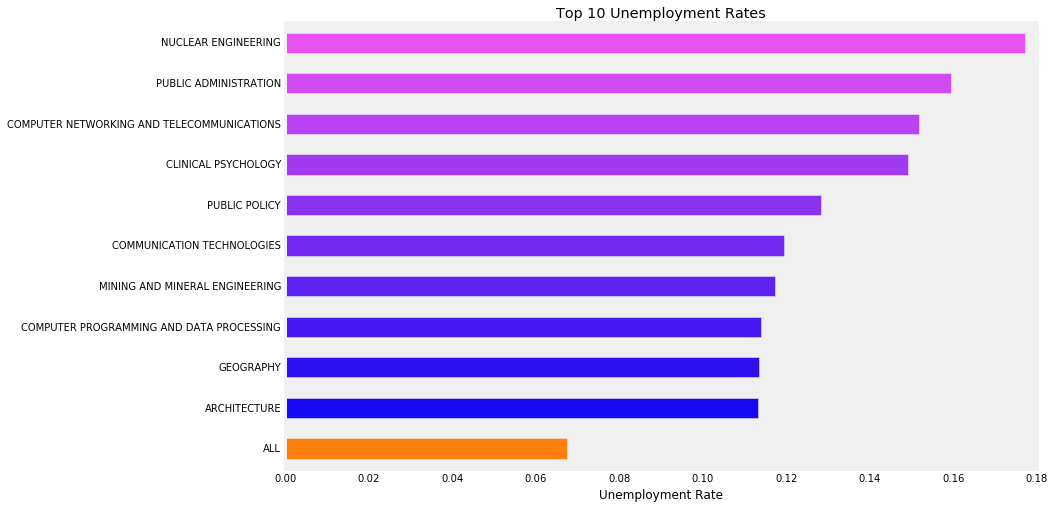

In [20]:
unemp_top_10 = recent_grads[['Major', 'Unemployment_rate']].sort_values('Unemployment_rate', ascending=False).head(10)
unemp_top_10 = unemp_top_10.append({'Major': 'ALL', 'Unemployment_rate': recent_grads.Unemployment_rate.median()},
                                   ignore_index=True) # add median unemployment rate of all majors
unemp_top_10 = unemp_top_10.sort_values('Unemployment_rate') # sort again so bar plot has greatest value at top

# customize colors
colors = [(x/11, x/31, 0.95) for x in range(11)]
colors[0] = (1, 127/255, 14/255)

unemp_top_10_barh = unemp_top_10.plot.barh(x='Major', y='Unemployment_rate', figsize=(12,8), color=colors)
unemp_top_10_barh.set_title('Top 10 Unemployment Rates')
unemp_top_10_barh.set_xlabel('Unemployment Rate')
unemp_top_10_barh.axes.get_yaxis().get_label().set_visible(False)
unemp_top_10_barh.get_legend().remove()
unemp_top_10_barh.grid(False)

## Which majors have the lowest unemployment rate?

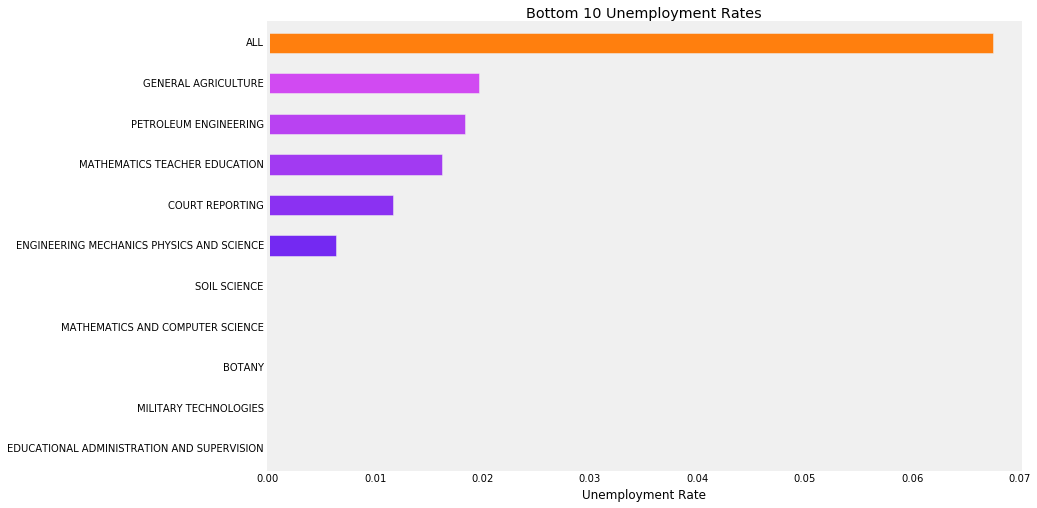

In [21]:
unemp_bot_10 = recent_grads[['Major', 'Unemployment_rate']].sort_values('Unemployment_rate').head(10)
unemp_bot_10 = unemp_bot_10.append({'Major': 'ALL', 'Unemployment_rate': recent_grads.Unemployment_rate.median()},
                                   ignore_index=True) # add median unemployment rate of all majors

# customize colors
colors = [(x/11, x/31, 0.95) for x in range(11)]
colors[10] = (1, 127/255, 14/255)

unemp_bot_10_barh = unemp_bot_10.plot.barh(x='Major', y='Unemployment_rate', figsize=(12,8), color=colors)
unemp_bot_10_barh.set_title('Bottom 10 Unemployment Rates')
unemp_bot_10_barh.set_xlabel('Unemployment Rate')
unemp_bot_10_barh.axes.get_yaxis().get_label().set_visible(False)
unemp_bot_10_barh.get_legend().remove()
unemp_bot_10_barh.grid(False)

# Proportion of women

Let's plot the distribution of the proportion of women among all majors.

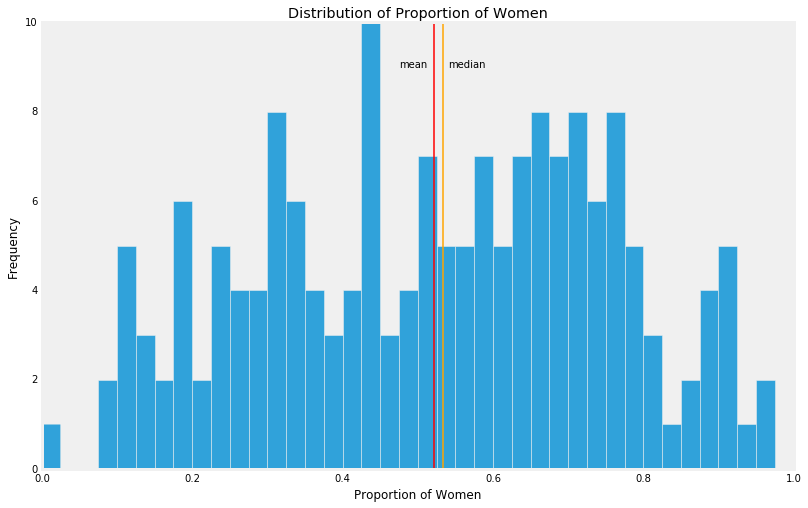

In [22]:
pro_wom_hist = recent_grads.ShareWomen.hist(range=(0,1), bins=40, figsize=(12,8))

pro_wom_hist.set_title('Distribution of Proportion of Women')
pro_wom_hist.set_xlabel('Proportion of Women')
pro_wom_hist.set_ylabel('Frequency')

pro_wom_hist.axvline(recent_grads.ShareWomen.mean(), linewidth=1.5, c='red', label='mean')
pro_wom_hist.text(0.475, 9, 'mean')

pro_wom_hist.axvline(recent_grads.ShareWomen.median(), linewidth=1.5, c='orange', label='median')
pro_wom_hist.text(0.54, 9, 'median')

pro_wom_hist.grid(False)

## Which majors have the highest proportion of women?

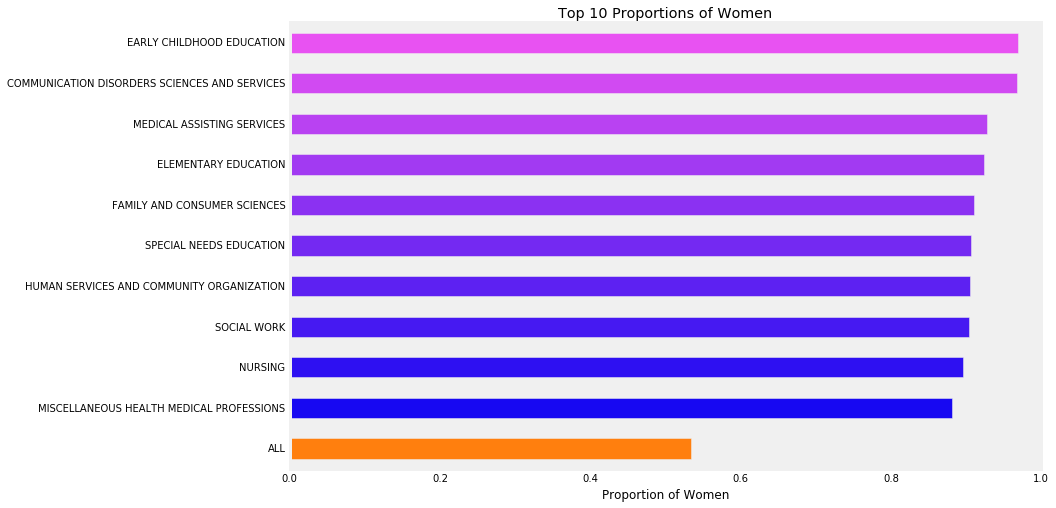

In [23]:
pro_wom_top_10 = recent_grads[['Major', 'ShareWomen']].sort_values('ShareWomen', ascending=False).head(10)
pro_wom_top_10 = pro_wom_top_10.append({'Major': 'ALL', 'ShareWomen': recent_grads.ShareWomen.median()},
                                       ignore_index=True) # add median proportion of women of all majors
pro_wom_top_10 = pro_wom_top_10.sort_values('ShareWomen') # sort again so bar plot has greatest value at top

# customize colors
colors = [(x/11, x/31, 0.95) for x in range(11)]
colors[0] = (1, 127/255, 14/255)

pro_wom_top_10_barh = pro_wom_top_10.plot.barh(x='Major', y='ShareWomen', figsize=(12,8), color=colors)
pro_wom_top_10_barh.set_title('Top 10 Proportions of Women')
pro_wom_top_10_barh.set_xlabel('Proportion of Women')
pro_wom_top_10_barh.axes.get_yaxis().get_label().set_visible(False)
pro_wom_top_10_barh.get_legend().remove()
pro_wom_top_10_barh.grid(False)

## Which majors have the lowest proportion of women?

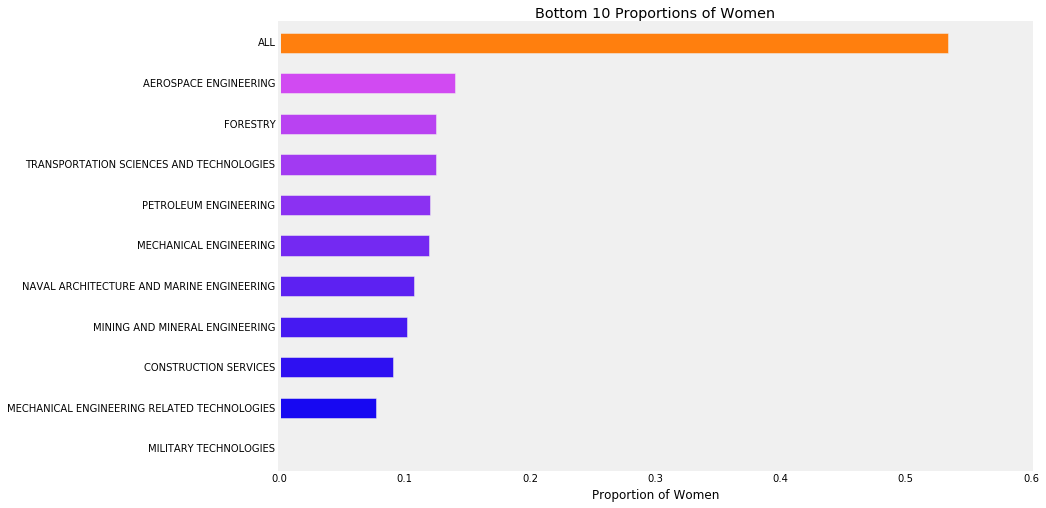

In [24]:
pro_wom_bot_10 = recent_grads[['Major', 'ShareWomen']].sort_values('ShareWomen').head(10)
pro_wom_bot_10 = pro_wom_bot_10.append({'Major': 'ALL', 'ShareWomen': recent_grads.ShareWomen.median()},
                                       ignore_index=True) # add median proportion of women of all majors

# customize colors
colors = [(x/11, x/31, 0.95) for x in range(11)]
colors[10] = (1, 127/255, 14/255)

pro_wom_bot_10_barh = pro_wom_bot_10.plot.barh(x='Major', y='ShareWomen', figsize=(12,8), color=colors)
pro_wom_bot_10_barh.set_title('Bottom 10 Proportions of Women')
pro_wom_bot_10_barh.set_xlabel('Proportion of Women')
pro_wom_bot_10_barh.axes.get_yaxis().get_label().set_visible(False)
pro_wom_bot_10_barh.get_legend().remove()
pro_wom_bot_10_barh.grid(False)

Finally, let's see which majors are closest to an even split between men and women.

## Which majors are closest in numbers of men and women?

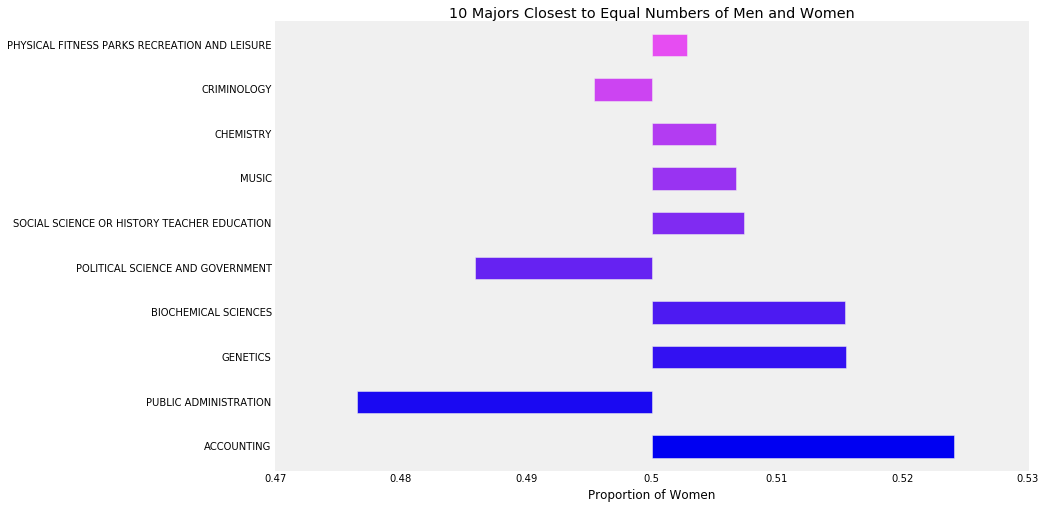

In [25]:
recent_grads['Distance_to_even'] = recent_grads.ShareWomen - 0.5
recent_grads['Abs_distance_to_even'] = abs(recent_grads.Distance_to_even)

closest_to_even = recent_grads.sort_values('Abs_distance_to_even').head(10)
closest_to_even = closest_to_even.sort_values('Abs_distance_to_even', ascending=False)

colors = [(x/10, x/30, 0.95) for x in range(10)]

closest_to_even_barh = closest_to_even.plot.barh(x='Major', y='Distance_to_even', figsize=(12,8), color=colors)
closest_to_even_barh.set_title('10 Majors Closest to Equal Numbers of Men and Women')
closest_to_even_barh.set_xticklabels([0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53])
closest_to_even_barh.set_xlabel('Proportion of Women')
closest_to_even_barh.axes.get_yaxis().get_label().set_visible(False)
closest_to_even_barh.get_legend().remove()
closest_to_even_barh.grid(False)